<a href="https://colab.research.google.com/github/arnab-mkj/Data-driven-operator-learning/blob/main/deep_operator_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Universal Approximation Theorem

The **Universal Approximation Theorem** is a fundamental result in neural network theory. It states that a feedforward neural network with at least one hidden layer containing a finite number of neurons, and with appropriate activation functions (such as sigmoid, ReLU, or tanh), can approximate any continuous function on a compact subset of \\({R}^n\\) to any desired degree of accuracy, given enough neurons in the hidden layer.

#### Key Points

- The theorem applies to **feedforward neural networks** (also called multilayer perceptrons).
- The network must have at least **one hidden layer**.
- The activation function must be **non-constant, bounded, and continuous** (sigmoid and tanh are common examples; later results also include ReLU).
- The theorem guarantees the **existence** of such a network, but does not say how to find the right parameters or how many neurons are needed in practice.

#### Mathematical Statement

Let \\( f: {R}^n --> {R} \\) be a continuous function on a compact subset \\( K \subset {R}^n \\). For any \\( \epsilon > 0 \\), there exists a neural network \( F \) with one hidden layer such that

$$
|f(x) - F(x)| < (\epsilon) \quad \text{for all } x \in K
$$

The universal approximation theorem states that neural networks can be used to approximate any continuous
 function to arbitrary accuracy if no constraint is placed on the width and depth of the hidden layers

- $u$: This represents the input function or input signal. It is the function that the operator $G$ acts upon. In the context of the DeepONet architecture, the network does not take the entire function u as input directly. Instead, it uses the values of the input function u evaluated at a fixed number of specific locations called "sensors" {x1, x2, ..., xm}.\
These sensor locations are the same for all input functions u in the training dataset.
The input function u is considered to belong to a set $V$, which is a compact set in the space of continuous functions $C(K1)$, where $K1$ is a compact set in a Banach space X.
\
- $G$: This symbol represents a nonlinear continuous operator. An operator is a mathematical mapping that takes an input function and transforms it into an output function. \

- $G(u)$: This notation refers to the output function that results from applying the operator G to the input function $u$ . In the examples discussed in the paper, $G(u)$ is the solution function $(s(x)$ or $s(x, t))$ of a differential equation (like an ODE or PDE) when $u$ is the input or source term for that equation. The operator $G$ maps a compact set $V$ of input functions (in $C(K1)$) to a set of output functions (in $C(K2)$, where $K2$ is a compact set in Rd). \

- $y$: This represents a specific location or point in the domain of the output function $G(u)$. It is the location where the value of the output function $G(u)$ is desired. \

- $G(u)(y)$: This is the real number value that represents the output function $G(u)$ evaluated at the specific location $y$. This is the target output that the DeepONet network is trained to predict, given the sensed input $u(x_i)$ and the location $y$.

# Universal Approximation Theorem for Operator

1. **The Core Idea**: The theorem states that a neural network with a specific structure can accurately approximate any nonlinear continuous operator. An operator $G$ is a mathematical mapping that takes an entire function $u$ as input and outputs another function $G(u)$.

2. **What is Approximated**: The theorem focuses on approximating the value of the output function $G(u)$ at a specific location $y$, denoted as $G(u)(y)$. This value $G(u)(y)$ is a real number.

3. **The Inputs to the Approximating Network**: To approximate $G(u)(y)$, the network needs two types of information as input:
* Information about the input function $u$. Since a network cannot directly process an entire continuous function, the theorem's structure (and the DeepONet architecture it inspires) uses the values of the input function $u$ evaluated at a fixed number of specific locations, called "sensors" {x1, x2, ..., xm} . These m sensor locations {x1, ..., xm} are the same for all input functions $u$ considered.
* The location $y$ where the output value $G(u)(y)$ is desired. This location $y$ can be a vector in ${R^d}$.

4. **The Network Structure**: describes a specific architecture (given by Eq. 1) that can achieve this approximation. This structure has two main parts that are combined:
* A "*branch*" part that processes the sensor values of the input function. This part takes the vector of values [u(x1), u(x2), ..., u(xm)] as input.
* A "*trunk*" part that processes the output location y. This part takes the vector y as input.
* Both parts utilize an activation function σ. The theorem requires $σ$ to be a continuous non-polynomial function. Many common activation functions used in neural networks, like sigmoid, tanh, and ReLU, satisfy this condition.
* The overall output G(u)(y) is approximated by combining the outputs of the branch and trunk parts, typically through summation or multiplication of corresponding components. The formula in Theorem 1 (Eq. 1) shows a sum of terms, where each term is a product of an output from the branch processing $u$ $(x_j)$ and an output from the trunk processing $y$.

5. **The Guarantee**: The theorem guarantees that for any desired level of accuracy (represented by ε > 0), you can find a network of this structure (with a sufficient number of neurons, represented by integers n, p, m, and specific weights and biases) such that the network's output is arbitrarily close (within ε) to the true value $G(u)(y)$ for all possible input functions $u$ within a specified set $V$ and all possible output locations $y$ within a specified set $K2$.

6. **Conditions for the Theorem to Hold**: The theorem holds under the assumption that:
* $σ$ is a continuous non-polynomial function.
* The space where input functions are defined (X) is a Banach space.
* The sets $K1$ (where $u$ is defined and sensors are located) and $K2$ (where $y$ is located) are compact.
* The set of input functions $V$ considered is a compact set in the space of continuous functions $C(K1)$.
* The operator $G$ is nonlinear and continuous
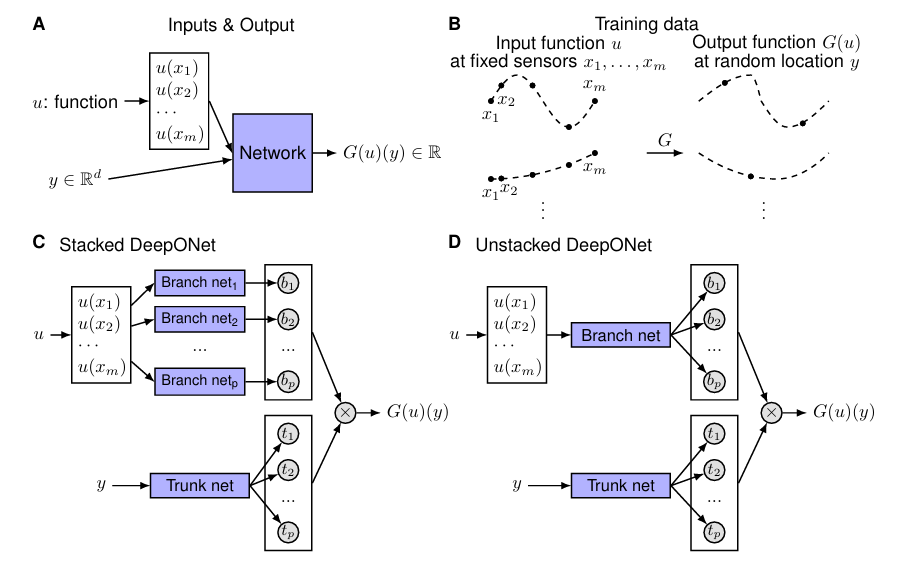

$$
\left|
G(u)(y) - \sum_{k=1}^{p} \sum_{i=1}^{n} c_i^k \, \sigma \left( \sum_{j=1}^{m} \xi_{ij}^k u(x_j) + \theta_i^k \right) \sigma(w_k \cdot y + \zeta_k)
\right| < \epsilon
$$

where the inner sum (branch) is:

$$
\sum_{j=1}^{m} \xi_{ij}^k u(x_j) + \theta_i^k
$$

and the outer function (trunk) is:

$$
\sigma(w_k \cdot y + \zeta_k)
$$

**Parameter definitions:**

- $G(u)(y)$: The target function evaluated at $y$ with input $u$.
- $p$: Number of terms in the outer sum (number of "trunks").
- $n$: Number of terms in the inner sum (number of "branches" per trunk).
- $c_i^k$: Coefficient for the $i$-th branch in the $k$-th trunk.
- $\sigma(\cdot)$: Activation function (e.g., sigmoid, tanh, ReLU).
- $m$: Number of input points $x_j$.
- $\xi_{ij}^k$: Weight for the $j$-th input in the $i$-th branch of the $k$-th trunk.
- $u(x_j)$: Value of the input function $u$ at point $x_j$.
- $\theta_i^k$: Bias for the $i$-th branch in the $k$-th trunk.
- $w_k$: Weight vector for the $k$-th trunk.
- $y$: Output variable.
- $\zeta_k$: Bias for the $k$-th trunk.
- $\epsilon$: Desired approximation accuracy.

### Why DeepONet is Needed

1. **The Universal Approximation Theorem for Operators has Limitations in Practice:**  
   While it is known that neural networks can accurately approximate any nonlinear continuous operator, the Universal Approximation Theorem (specifically Theorem 1) only guarantees a small approximation error for a sufficiently large network. It does not consider the important optimization error and generalization error.

2. **Optimization and Generalization Errors are Crucial:**  
   These other error types (optimization and generalization errors) are equally important and often dominant contributions to the total error in practice. The theorem provides a theoretical basis but does not inform how to learn operators effectively. Networks that are practically useful must be easy to train (small optimization error) and generalize well to unseen data (small generalization error).

3. **Generic Architectures are Insufficient for Operators:**  
   Similar to how generic fully-connected neural networks (FNNs) perform poorly compared to specialized architectures like Convolutional Neural Networks (CNNs) for tasks like image classification, despite FNNs being universal function approximators, a specific architecture is needed for effectively learning operators. Directly using classical networks like FNNs by concatenating the inputs (sensed function values and output location) doesn't leverage any specific structure of the problem.

4. **Need for a Specific Architecture to Reduce Generalization Error:**  
   To realize the universal approximation theorem for operators in practice, and to learn operators accurately and efficiently from data, a specific network architecture is required that minimizes the total error, particularly by achieving smaller generalization error.

Therefore, **DeepONet** is proposed as a specific network architecture designed to address these practical challenges. It aims to learn operators accurately and efficiently from a relatively small dataset. Its design, consisting of two sub-networks – a branch net for the input function values at sensors and a trunk net for the output locations – is intended to significantly reduce the generalization error compared to generic fully-connected networks. This specific architecture provides an inductive bias consistent with the problem structure (the output \( G(u)(y) \) depends independently on the input function \( u \) and the output location \( y \)).

In [1]:
import jax
import jax.numpy as jnp
from jax.scipy.integrate import trapezoid # For numerical integration
import matplotlib.pyplot as plt
from typing import Tuple, Callable
import numpy as np

In [2]:
key = jax.random.key(0)

###  Defining the Gaussian Random Field (GRF) for u(x)
We'll generate our input functions u(x) from a GRF. This requires defining a kernel function (we'll use RBF) and a way to sample from the GRF.

The Radial Basis Function (RBF) kernel, or squared exponential kernel, is defined as:
$$
k(x_1, x_2) =  \exp\left(-\frac{\|x_1 - x_2\|^2}{2l^2}\right)
$$

$l$ is the length-scale.

In [3]:
def rbf_kernel(x1: jnp.ndarray, x2: jnp.ndarray, length_scale: float) -> jnp.ndarray:
  """
  Computes the RBF kernel between two sets of points.
  x1, x2: (N,D) array of N points in D dimension
  length_scale: the length scale of the kernel
  Returns: (N, M) kernel matrix
  """
  x1 = jnp.atleast_2d(x1)
  x2 = jnp.atleast_2d(x2)

  # COmpute the squared Eucledian distance
  diff = x1[:, None, :] - x2[None, :, :] #(N,M,D)
  sq_dist = jnp.sum(diff**2, axis=-1) #(N,M)
  exp_value = jnp.exp(-0.5 * sq_dist / length_scale**2)
  # print("exp_rbf_kernel: ", exp_value)
  return exp_value

def gram_matrix(kernel_fn: Callable, x: jnp.ndarray) -> jnp.ndarray:
  """Computes the gram matrix(x,x) for a given kernel and points x"""
  return kernel_fn(x, x)


### Sampling from GRF

To sample a function u(x) from G(0, k(x,x')) at points x_eval_pts, we sample from a multivariate Normal distribution: u ~ N(0, K), where K is the Gram matrix k(x_eval_pts, x_eval_pts).

In [4]:

def sample_grf(key: jax.random.key, kernel_fn: Callable, eval_pts: jnp.ndarray, num_samples: int, jitter: float = 1e-3) -> jnp.ndarray:
  """
  Samples the function from a GRF
  kernel_fn: Callable that takes (x1, x2) and returns a kernel matrix
  eval_pts: (N-eval, D) array of points at which to evaluate the GRF
  jitter: small value to add to diagonal for numerical stability
  Returns: (num_samples, N_eval) array of function samples
  """
  K = gram_matrix(kernel_fn, eval_pts) # eval_points is x_fine_grid
  K_stable = K + jitter * jnp.eye(K.shape[0])  # for numerical stability since for cholesky decomp, the matric must be positivr definite

  # print("K: ", K, K.shape)
  # print("K_stable: ", K_stable)
  # Cholesky decomposition: L L^T = K
  L = jnp.linalg.cholesky(K_stable)
  # print("L: ", L)

  #Standard normal smaples
  z = jax.random.normal(key, shape = (K.shape[1], num_samples)) # Shape(N_eval, num_samples)
  # print("z:", z)

  # u = L @ z
  samples = jnp.dot(L, z).T # Shape (num-samples, N_eval)
  #This matrix multiplication takes each column of independent random numbers in z and transforms it into a column of correlated random numbers.
  # The output is a set of values for one of our smooth functions.
  # print(samples) # nan
  return samples


In [5]:
# domain for u(x) and y
domain_start = 0.0
domain_end = 1.0

# Fine grid for defining u(x)
num_fine_pts = 200
x_fine_grid = jnp.linspace(domain_start, domain_end, num_fine_pts).reshape(-1,1)

# print(x_fine_grid)
# sensor locations for the branch net(fixed for all samples)
num_sensors = 100
x_sensors = jnp.linspace(domain_start, domain_end, num_sensors).reshape(-1, 1)

#Parameter for GRF
grf_length_scale = 0.2
partial_rbf_kernel = lambda x1, x2: rbf_kernel(x1, x2, length_scale=grf_length_scale) # this is a function where the x1, x2 argument values are provided later in code

### The "Solver": Numerical Integration for Antiderivative
For our operator $ G(u)(y) = \int_0^y u(t) dt $, the solver is numerical integration. We'll use JAX's trapezoid rule.

In [6]:
def compute_antiderivative(u_on_fine_grid: jnp.ndarray,
                                    x_fine: jnp.ndarray,
                                    y_loc: float,
                                    domain_start_val: float,
                                    domain_end_val: float # domain_end_val is not strictly needed here but good practice
                                   ) -> float:
    """
    Computes the antiderivative from domain_start_val to y_loc using a JAX-friendly
    prefix-sum method that avoids dynamic shapes.
    """
    x_fine_flat = x_fine.flatten()

    # --- Main Logic ---
    # This function calculates Integral_{domain_start_val}^{y_loc} u(t) dt
    # by computing (Integral_{x_0}^{y_loc}) - (Integral_{x_0}^{domain_start_val}),
    # where x_0 is the start of the fine grid.

    # Step 1: Pre-compute the "running total" of the integral on the fine grid.
    # This is the integral from x_fine_flat[0] to every other x_fine_flat[i].
    all_segment_integrals = (u_on_fine_grid[:-1] + u_on_fine_grid[1:]) * 0.5 * (x_fine_flat[1:] - x_fine_flat[:-1])
    prefix_integrals_on_grid = jnp.concatenate([jnp.array([0.0]), jnp.cumsum(all_segment_integrals)])
    # Now, prefix_integrals_on_grid[k] = Integral_{x_0}^{x_k} u(t) dt

    # Step 2: Define a helper function to get the integral from the grid origin (x_0) to *any* point.
    def get_integral_from_origin(target_x: float) -> float:
        """Calculates the integral from x_fine_flat[0] to target_x."""

        # Find the index of the grid point just to the right of target_x
        idx_target = jnp.searchsorted(x_fine_flat, target_x)

        # Get the integral up to the grid point just to the left of target_x.
        # We use lax.cond for a safe lookup at index idx_target - 1.
        integral_up_to_prev_grid_pt = jax.lax.cond(
            idx_target == 0,
            lambda: 0.0, # If target_x is before the first point, this part is 0.
            lambda: prefix_integrals_on_grid[idx_target - 1]
        )

        # Now, calculate the integral for the small final segment, from the previous
        # grid point up to target_x itself.
        x_prev = jax.lax.cond(idx_target == 0, lambda: x_fine_flat[0], lambda: x_fine_flat[idx_target - 1])
        u_prev = jax.lax.cond(idx_target == 0, lambda: u_on_fine_grid[0], lambda: u_on_fine_grid[idx_target - 1])

        # Find the value u(target_x) by linear interpolation.
        u_target_interp = jnp.interp(target_x, x_fine_flat, u_on_fine_grid)

        # Area of the last small trapezoid.
        last_segment_integral = (u_prev + u_target_interp) * 0.5 * (target_x - x_prev)

        return integral_up_to_prev_grid_pt + last_segment_integral

    # Step 3: Use the helper function to get the final result.
    integral_to_y_loc = get_integral_from_origin(y_loc)
    integral_to_domain_start = get_integral_from_origin(domain_start_val)

    # The final result is the difference.
    final_result = integral_to_y_loc - integral_to_domain_start

    # Handle the case where y_loc is before the start of the integration domain.
    return jnp.where(y_loc <= domain_start_val, 0.0, final_result)


# The vmap definitions that wrap this function remain the same.
# Just make sure they are pointing to the new `compute_antiderivative_jaxified` function.
vmap_compute_antiderivative_single_u = jax.vmap(
    compute_antiderivative, in_axes=(None, None, 0, None, None), out_axes=0
)

vmap_compute_antiderivative_batch_u_y = jax.vmap(
    vmap_compute_antiderivative_single_u, in_axes=(0, None, 0, None, None), out_axes=0
)

### Main data generation function
This function will orchestrate the sampling of $u$, evaluation at sensor points, generation of $y$ locations, and computation of $G(u)(y)$.

In [7]:
def generate_data_antiderivative(key: jax.random.key, num_u_samples: int, num_y_per_u: int,
                                 x_fine_grid: jnp.ndarray, x_sensors: jnp.ndarray, grf_kernel_fn:Callable,
                                 domain_start_val: float, domain_end_val: float
                                 ) -> Tuple[jnp.ndarray, jnp.ndarray, jnp.ndarray]:

  """
    Generates data for DeepONet training for the antiderivative operator.

    Returns:
        branch_inputs: (num_u_samples * num_y_per_u, N_sensors)
        trunk_inputs:  (num_u_samples * num_y_per_u, 1)  (y locations)
        outputs:       (num_u_samples * num_y_per_u, 1)  (G(u)(y) values)
    """
  key_grf, key_y_locs = jax.random.split(key)

  # 1. Sample u(x) functions on the fine grid
  u_samples_fine = sample_grf(key_grf, grf_kernel_fn, x_fine_grid, num_u_samples)
  # u_samples_fine shape: (num_u_samples, N_fine)

  # print(u_samples_fine) #nan

  # 2. Evaluate/Interpolate u(x) at sensor locations for branch input
  # jax.vmap jnp.interp oover the samples of u
  # xp is x_fine_grid.flatten(), fp is each row of u_samples_fine, x is x_sensors.flatten()

  vmap_interp = jax.vmap(jnp.interp, in_axes=(None, None, 0), out_axes=0)
  # None: This means "Do NOT loop over this argument."

  branch_inputs_raw = vmap_interp(x_sensors.flatten(), x_fine_grid.flatten(), u_samples_fine)
  #The signature for jnp.interp is: jnp.interp(x, xp, fp)
  # x: The points where you want to find the value.
  # xp: The x-coordinates of the known data points.
  # fp: The y-coordinates of the known data points.

  # 3. Generate y locations for trunk input
  # For each u_sample, generate num_y_per_u random y locations

  y_locs_batch = jax.random.uniform(key_y_locs, shape=(num_u_samples, num_y_per_u), minval=domain_start, maxval=domain_end)
  # y_locs_batch shape: (num_u_samples, num_y_per_u)

  # 4. Compute G(u)(y) - the antiderivative
  # We need to call vmap_compute_antiderivative_single_u for each u_sample_fine
  # with its corresponding set of y_locs from y_locs_batch.


  # outputs_raw shape: (num_u_samples, num_y_per_u)
  outputs_raw = vmap_compute_antiderivative_batch_u_y(u_samples_fine, x_fine_grid, y_locs_batch, domain_start_val, domain_end_val)
  # print(outputs_raw) # nan nan


  # 5. Repeat inputs to match the structure (num_u_samples * num_y_per_u, ...)
  # Each of the num_u_samples branch inputs needs to be repeated num_y_per_u times
  branch_inputs = jnp.repeat(branch_inputs_raw, num_y_per_u, axis=0)

  # y_locs_batch needs to be flattened and reshaped
  trunk_inputs = y_locs_batch.reshape(-1, 1)

  # outputs_raw needs to be flattened and reshaped
  outputs = outputs_raw.reshape(-1, 1)

  return branch_inputs, trunk_inputs, outputs, u_samples_fine


### generate and Inspecting data

In [8]:

# Data generation parameters
num_u_functions = 100  # Number of different u(x) functions to generate
num_y_per_u = 20 # For each u(x), how many y locations to evaluate G(u)(y)

key, data_gen_key = jax.random.split(key)

branch_data, trunk_data, output_data, u_samples_fine_batch = generate_data_antiderivative(
    data_gen_key,
    num_u_functions,
    num_y_per_u,
    x_fine_grid,
    x_sensors,
    partial_rbf_kernel,
    domain_start,
    domain_end
)
print(f"Training data generated with {branch_data.shape[0]} samples.")
print("Shapes of generated data:")
print(f"Branch inputs (u_sensors): {branch_data.shape}")
print(f"Trunk inputs (y_locs):   {trunk_data.shape}")
print(f"Outputs (G(u)(y)):       {output_data.shape}")
# print(output_data)

# Expected total samples: num_u_functions * num_y_evals_per_u
total_samples = num_u_functions * num_y_per_u
assert branch_data.shape[0] == total_samples
assert trunk_data.shape[0] == total_samples
assert output_data.shape[0] == total_samples
assert branch_data.shape[1] == num_sensors
assert trunk_data.shape[1] == 1 # y is scalar
assert output_data.shape[1] == 1 # G(u)(y) is scalar

Shapes of generated data:
Branch inputs (u_sensors): (2000, 100)
Trunk inputs (y_locs):   (2000, 1)
Outputs (G(u)(y)):       (2000, 1)


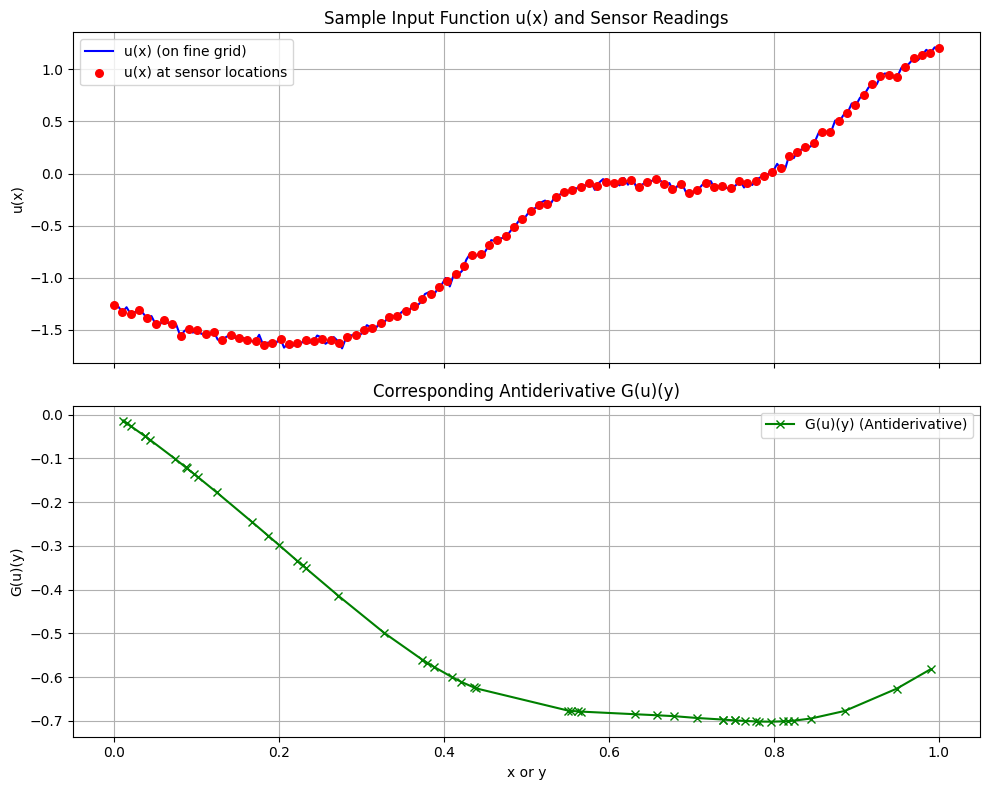

[[ 0.03388955]
 [ 0.2557391 ]
 [ 0.53699255]
 ...
 [-0.25669068]
 [-0.8403414 ]
 [-0.12922199]]

--- Checking data point 0 from generated batch ---
y_loc (trunk input): 0.0908
G(u)(y_loc) (target output): 0.0339
[ 0.19900686  0.2404237   0.2668797   0.26009256  0.30925667  0.3033916
  0.2581621   0.3101387   0.3349138   0.33928427  0.41179103  0.42163897
  0.4299344   0.467935    0.51771736  0.5181812   0.5015363   0.47912487
  0.4751535   0.5647167   0.5854747   0.60838735  0.63033855  0.6830591
  0.65001094  0.7419234   0.73496795  0.7262493   0.82926697  0.7298785
  0.7695346   0.7864515   0.79322094  0.788107    0.8123779   0.9115947
  0.90279204  0.90579313  0.88456124  0.8707387   0.81729305  0.90484786
  0.9007701   0.8715586   0.88680613  0.9583331   0.93933874  0.9354368
  0.9096586   0.84096545  0.9479694   0.8980157   0.8218241   0.8935637
  0.93304294  0.817693    0.7900523   0.83093864  0.84226614  0.8778102
  0.8649051   0.82385594  0.7977495   0.81649995  0.8672121   0.7

In [9]:
# For visualization, let's re-sample one u function and its antiderivative
key_vis, key_grf_vis, key_y_vis = jax.random.split(key, 3)
u_sample_vis = sample_grf(key_grf_vis, partial_rbf_kernel, x_fine_grid, 1)[0] # Take the first sample

# Sensor values for this u_sample_vis
u_at_sensors_vis = jnp.interp(x_sensors.flatten(), x_fine_grid.flatten(), u_sample_vis)

# Generate some y locations for visualization for this specific u
num_y_vis = 50
y_locs_vis = jnp.sort(jax.random.uniform(key_y_vis, shape=(num_y_vis,), minval=domain_start, maxval=domain_end))

# Compute antiderivative at these y_locs_vis
Gu_y_vis = vmap_compute_antiderivative_single_u(u_sample_vis, x_fine_grid, y_locs_vis, domain_start, domain_end)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot u(x)
axs[0].plot(x_fine_grid, u_sample_vis, label="u(x) (on fine grid)", color='blue')
axs[0].scatter(x_sensors, u_at_sensors_vis, color='red', marker='o', s=30, zorder=5, label="u(x) at sensor locations")
axs[0].set_ylabel("u(x)")
axs[0].set_title("Sample Input Function u(x) and Sensor Readings")
axs[0].legend()
axs[0].grid(True)

# Plot G(u)(y)
axs[1].plot(y_locs_vis, Gu_y_vis, label="G(u)(y) (Antiderivative)", color='green', marker='x')
axs[1].set_xlabel("x or y")
axs[1].set_ylabel("G(u)(y)")
axs[1].set_title("Corresponding Antiderivative G(u)(y)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(output_data)
# Check a specific data point from the generated batch
sample_idx_to_check = 0
print(f"\n--- Checking data point {sample_idx_to_check} from generated batch ---")
branch_val = branch_data[sample_idx_to_check]
trunk_val = trunk_data[sample_idx_to_check].item() # y_loc
output_val = output_data[sample_idx_to_check].item() # G(u)(y_loc)

print(f"y_loc (trunk input): {trunk_val:.4f}")
print(f"G(u)(y_loc) (target output): {output_val:.4f}")

# To verify this, we need to find which original u_sample this corresponds to
original_u_idx = sample_idx_to_check // num_y_per_u
u_original_fine_for_check = u_samples_fine_batch[original_u_idx]
print(u_original_fine_for_check)

# Recompute G(u)(y_loc) for this specific u and y_loc
recomputed_Gu_y = compute_antiderivative(u_original_fine_for_check, x_fine_grid, trunk_val, domain_start, domain_end)
print(f"Recomputed G(u)(y_loc) for verification: {recomputed_Gu_y:.4f}")
print(f"Difference: {abs(output_val - recomputed_Gu_y):.2e}")

# Also check the branch input
u_at_sensors_for_check = jnp.interp(x_sensors.flatten(), x_fine_grid.flatten(), u_original_fine_for_check)
print(f"Max diff in branch input: {jnp.max(jnp.abs(branch_val - u_at_sensors_for_check)):.2e}")

The number num_u_samples (e.g., 1000) is the number of u functions we create. For each of these u functions, we find its value at the 50 sensor positions. Then, for that same u function, we find the output value at 20 different y locations.

#  a Core JAX Error in the Antiderivative Calculation

This document explains a critical error encountered in our data generation pipeline and the robust solution that was implemented.

## 1. Overview

The data generation script requires a function, `compute_antiderivative`, to calculate the integral of randomly generated functions. Our initial version of this function failed with a `NonConcreteBooleanIndexError` when used with JAX's `vmap` or `jit`.

The error was caused by an algorithm that was fundamentally incompatible with JAX's static computation graph model. The fix involved replacing the algorithm with a "Prefix Sum" method that is mathematically equivalent but designed to be fully compatible with JAX.

## 2. The Problem: `NonConcreteBooleanIndexError`

The goal was to calculate the integral of a function `u(x)` from a start point `a` to an end point `b`.

### The Flawed Approach

The initial, intuitive approach was:
1.  Find all the grid points that fall within the integration range `[a, b]`.
2.  Create **new, smaller arrays** containing only these selected points.
3.  Perform the integration on these smaller arrays.

The code that implemented this logic failed at the point of array creation:

```python
# The line that caused the error
mask = x_fine_flat <= y_loc
u_masked = u_on_fine_grid[mask] # <-- ERROR: Creates a dynamically sized array
```

Why This Fails in JAX? \\
JAX compiles functions into a static computation graph before running them. Think of this graph as a fixed blueprint.

The error occurs because the size of the u_masked array depends on the runtime value of $y_{loc}$. This means the blueprint would need to have a wall whose size is unknown at design time. JAX's compiler cannot create a static blueprint for a computation involving dynamically shaped arrays.

The NonConcreteBooleanIndexError is JAX's way of saying: "You cannot use a data-dependent value to define the shape of an array within my static blueprint."

## 3. The Solution: The "Prefix Sum" Method
The corrected approach avoids creating dynamically sized arrays altogether. It works exclusively with fixed-size arrays.

The new algorithm is based on the mathematical identity:
$
\int_{a}^{b} u(t) dt = \left( \int_{x_0}^{b} u(t) dt \right) - \left( \int_{x_0}^{a} u(t) dt \right)
$
where x_0 is the fixed starting point of our grid.

The new JAX-friendly algorithm works in three steps:

Pre-compute a "Running Total": It first calculates the integral from the start of the grid $(x_0)$ to every other point x_i on the grid. This is done once and stored in a fixed-size array.
Create a Helper Function: It defines a helper that can find the integral from $x_0$ to any point $target_x$ (even if target_x is not on the grid). It does this by looking up the nearest pre-computed value and adding the small, final segment calculated via interpolation.
Calculate the Final Result: It calls the helper function for the endpoint b and the start point a and simply subtracts the results.


### Step 1: The Generalized Baseline FNN

In [10]:

import flax.linen as nn
from flax.training import train_state
import optax
from typing import Sequence

In [11]:
# --- The Generalized FNN Model Definition ---
class BaselineFNN(nn.Module):
    depth: int  # The number of hidden layers
    width: int  # The number of neurons in each hidden layer

    @nn.compact
    def __call__(self, x):
        # x is the concatenated input: [u_sensors, y_loc]

        # Hidden layers
        for _ in range(self.depth):
            x = nn.Dense(features=self.width)(x)
            x = nn.relu(x)

        # Final output layer to produce a single scalar value
        x = nn.Dense(features=1)(x)
        return x.squeeze() # Squeeze to get shape (batch,) for easier loss calculation

### Step 2: The Training and Evaluation Logic

In [12]:
# --- Loss and Training Step Functions ---

def mse_loss(true_y, pred_y):
    """Calculates the Mean Squared Error loss."""
    return jnp.mean((true_y - pred_y)**2)

@jax.jit
def train_step_baseline(state, batch):
    """Performs a single training step for the baseline FNN."""
    branch_inputs, trunk_inputs, targets = batch
    # The key feature of the baseline: concatenate inputs into one vector
    combined_inputs = jnp.concatenate([branch_inputs, trunk_inputs], axis=-1)

    def loss_fn(params):
        predictions = state.apply_fn({'params': params}, combined_inputs)
        loss = mse_loss(targets.flatten(), predictions.flatten())
        return loss

    grad_fn = jax.value_and_grad(loss_fn)
    loss, grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss

@jax.jit
def eval_model_baseline(params, model, batch):
    """Evaluates the baseline FNN on a batch of data."""
    branch_inputs, trunk_inputs, targets = batch
    combined_inputs = jnp.concatenate([branch_inputs, trunk_inputs], axis=-1)
    predictions = model.apply({'params': params}, combined_inputs)
    loss = mse_loss(targets.flatten(), predictions.flatten())
    return loss

In [17]:
# --- Hyperparameter Configuration ---
# EDIT THESE VALUES TO RUN DIFFERENT EXPERIMENTS
hyperparams = {
    "learning_rate": 1e-2,
    "depth": 2,          # Number of hidden layers
    "width": 10,        # Neurons per hidden layer
    "num_epochs": 50000,
    "batch_size": 256
}

results_log = {}

# --- 1. Initialize the Model based on Hyperparameters ---
print(f"Building model with depth={hyperparams['depth']} and width={hyperparams['width']}")
baseline_model = BaselineFNN(depth=hyperparams['depth'], width=hyperparams['width'])

key_init, _ = jax.random.split(jax.random.PRNGKey(42))
# The input size is the number of sensors + 1 (for the y location)
dummy_input = jnp.ones([1, num_sensors + 1])
params = baseline_model.init(key_init, dummy_input)['params']

# --- 2. Initialize the Optimizer and TrainState ---
optimizer = optax.adam(learning_rate=hyperparams['learning_rate'])
state = train_state.TrainState.create(apply_fn=baseline_model.apply, params=params, tx=optimizer)

# --- 3. The Training Loop ---
print(f"Starting training with LR={hyperparams['learning_rate']:.1e} for {hyperparams['num_epochs']} epochs...")
train_losses = []
num_train_samples = branch_data.shape[0]
steps_per_epoch = num_train_samples // hyperparams['batch_size']

for epoch in range(hyperparams['num_epochs']):
    # Shuffle data each epoch
    key_shuffle, _ = jax.random.split(jax.random.PRNGKey(epoch))
    perm = jax.random.permutation(key_shuffle, num_train_samples)
    shuffled_branch_train = branch_data[perm]
    shuffled_trunk_train = trunk_data[perm]
    shuffled_output_train = output_data[perm]

    epoch_loss = 0
    for i in range(steps_per_epoch):
        start_idx = i * hyperparams['batch_size']
        end_idx = start_idx + hyperparams['batch_size']
        batch = (
            shuffled_branch_train[start_idx:end_idx],
            shuffled_trunk_train[start_idx:end_idx],
            shuffled_output_train[start_idx:end_idx]
        )
        state, loss = train_step_baseline(state, batch)
        epoch_loss += loss

    avg_epoch_loss = epoch_loss / steps_per_epoch
    train_losses.append(avg_epoch_loss)
    if (epoch + 1) % 1000 == 0: # Print progress every 10 epochs
        print(f"  Epoch {epoch+1}/{hyperparams['num_epochs']}, Avg Training Loss: {avg_epoch_loss:.6f}")

print("Training finished!")

# --- 4. Final Evaluation on the Test Set ---
# (Assuming you have branch_test, trunk_test, output_test generated separately)
# test_loss = eval_model_baseline(state.params, baseline_model, (branch_test, trunk_test, output_test))
# print(f"\nFinal Test Loss (MSE) for this configuration: {test_loss:.6f}")


exp_name = f"d{hyperparams['depth']}_w{hyperparams['width']}_lr{hyperparams['learning_rate']:.0e}"
print(f"Logging results for experiment: {exp_name}")

# Store the results in our global log
results_log[exp_name] = {
    'hyperparams': hyperparams.copy(), # Store a copy of the hyperparams
    'train_losses': train_losses,      # Store the list of losses
    # 'test_loss': test_loss           # You can also store the final test loss here
}

print("\n--- Current Logged Experiments ---")
for name in results_log:
    print(f"- {name}")

Building model with depth=2 and width=10
Starting training with LR=1.0e-02 for 50000 epochs...
  Epoch 1000/50000, Avg Training Loss: 0.002327
  Epoch 2000/50000, Avg Training Loss: 0.001755
  Epoch 3000/50000, Avg Training Loss: 0.001526
  Epoch 4000/50000, Avg Training Loss: 0.001489
  Epoch 5000/50000, Avg Training Loss: 0.001059
  Epoch 6000/50000, Avg Training Loss: 0.001216
  Epoch 7000/50000, Avg Training Loss: 0.001319
  Epoch 8000/50000, Avg Training Loss: 0.001162
  Epoch 9000/50000, Avg Training Loss: 0.001027
  Epoch 10000/50000, Avg Training Loss: 0.001051
  Epoch 11000/50000, Avg Training Loss: 0.000809
  Epoch 12000/50000, Avg Training Loss: 0.000929
  Epoch 13000/50000, Avg Training Loss: 0.000892
  Epoch 14000/50000, Avg Training Loss: 0.000948
  Epoch 15000/50000, Avg Training Loss: 0.001169
  Epoch 16000/50000, Avg Training Loss: 0.000900
  Epoch 17000/50000, Avg Training Loss: 0.001148
  Epoch 18000/50000, Avg Training Loss: 0.000762
  Epoch 19000/50000, Avg Trainin

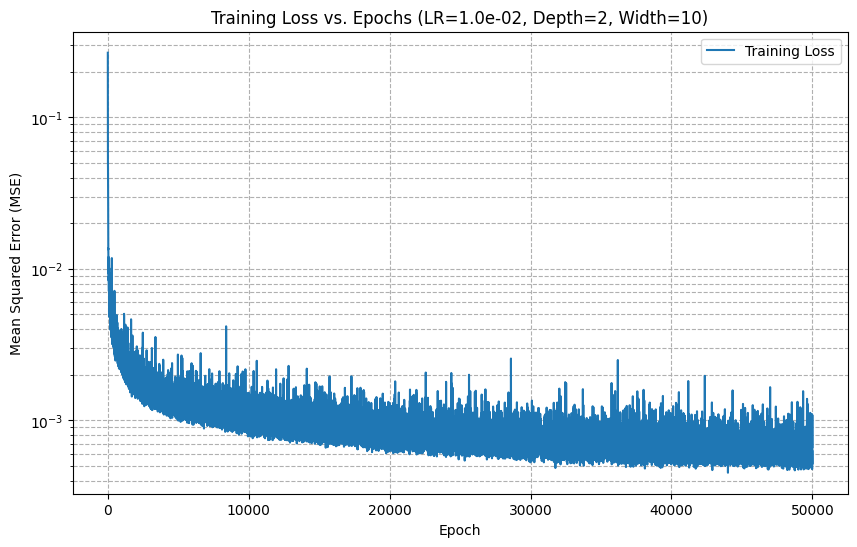

In [19]:
# --- 5. Plotting the Training Loss ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, hyperparams['num_epochs'] + 1), train_losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(f"Training Loss vs. Epochs (LR={hyperparams['learning_rate']:.1e}, Depth={hyperparams['depth']}, Width={hyperparams['width']})")
plt.yscale('log') # Use a logarithmic scale for the y-axis to see details better
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:

# Run this cell whenever you want to compare all the experiments you've run so far.

def plot_all_results(log):
    plt.figure(figsize=(12, 8))

    for exp_name, results in log.items():
        epochs = len(results['train_losses'])
        plt.plot(
            range(1, epochs + 1),
            results['train_losses'],
            label=exp_name # The label for each line is the experiment name
        )

    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Comparison of Training Loss for Different Configurations")
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

# Call the plotting function with our log
plot_all_results(results_log)
